In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png')
a_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/after.png')

b_img = cv2.cvtColor(b_img, cv2.COLOR_BGR2GRAY)
a_img = cv2.cvtColor(a_img, cv2.COLOR_BGR2GRAY)


In [3]:
b_img.max(), np.median(b_img), b_img.min()

(246, 77.0, 14)

In [13]:
thresh, thresh_img = cv2.threshold(b_img, 90, 256, type=cv2.THRESH_BINARY)

255 136.0 0


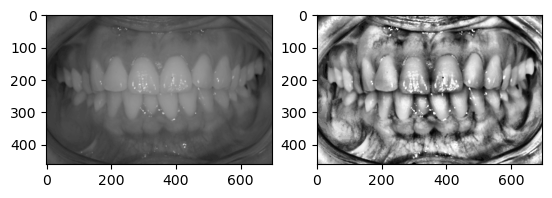

In [44]:
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png', 0)
b_img_c = b_img.copy()

clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(8,8))
b_img_c = clahe.apply(b_img_c)

thresh, thresh_img = cv2.threshold(b_img_c, 120, 200, type=cv2.THRESH_BINARY)
print(b_img_c.max(), np.median(b_img_c), b_img_c.min())

contours, heirarchy = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]
cv2.drawContours(b_img_c, [cnt], -1, (0,255,255), 5)


plt.subplot(121)
plt.imshow(b_img, cmap='gray')

plt.subplot(122)
plt.imshow(b_img_c, cmap='gray')

plt.show()

In [14]:
thresh_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

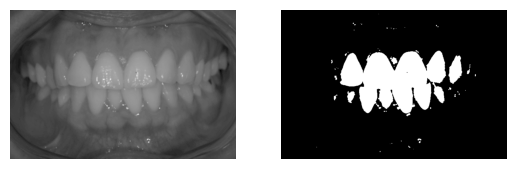

In [38]:
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png', 0)

thresh, thresh_img = cv2.threshold(b_img, 120, 200, type=cv2.THRESH_BINARY)

plt.subplot(121)
plt.imshow(b_img, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(thresh_img, cmap='gray')
plt.axis('off')
plt.show()